# Análise Exploratória de Violações de Dados

## Introdução

Olá. Meu nome é Caio.

Está é a minha primeira análise de dados documentada.

Estarei analisando um dataset que contém uma compilação de dados de diversas fontes diferentes sobre violações de dados de empresas.

Fonte: Kaggle (https://www.kaggle.com/datasets/thedevastator/data-breaches-a-comprehensive-list)

Sou mente aberta, então sinta-se livre para realizar críticas construtivas.

Boa leitura! :)

## Bibliotecas

Estarei utilizando as bibliotecas
* pandas
* numpy
* matplotlib
* seaborn

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import scipy.stats as stats
import re

## DataSet

### Carregando DataSet

In [2]:
df = pd.read_csv('data_breaches.csv')

### Topo da tabela

In [3]:
df.head()

,Unnamed: 0,Entity,Year,Records,Organization type,Method,Sources
0,0,21st Century Oncology,2016,2200000,healthcare,hacked,[5][6]
1,1,500px,2020,14870304,social networking,hacked,[7]
2,2,Accendo Insurance Co.,2020,175350,healthcare,poor security,[8][9]
3,3,Adobe Systems Incorporated,2013,152000000,tech,hacked,[10]
4,4,Adobe Inc.,2019,7500000,tech,poor security,[11][12]


### Informações básicas da tabela

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         352 non-null    int64 
 1   Entity             352 non-null    object
 2   Year               352 non-null    object
 3   Records            350 non-null    object
 4   Organization type  352 non-null    object
 5   Method             351 non-null    object
 6   Sources            350 non-null    object
dtypes: int64(1), object(6)
memory usage: 19.4+ KB


### Nomes das colunas

In [5]:
df.columns

Index(['Unnamed: 0', 'Entity', 'Year', 'Records', 'Organization type',
       'Method', 'Sources'],
      dtype='object')

### Descrição de colunas numéricas

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,352.0,175.5,101.757883,0.0,87.75,175.5,263.25,351.0


### Número de linhas e colunas

In [7]:
df.shape

(352, 7)

### Contagem de registros nulos por coluna

In [8]:
df.isnull().sum()

Unnamed: 0           0
Entity               0
Year                 0
Records              2
Organization type    0
Method               1
Sources              2
dtype: int64

### Número de registros únicos por coluna

In [9]:
df.nunique()

Unnamed: 0           352
Entity               331
Year                  22
Records              255
Organization type     70
Method                25
Sources              312
dtype: int64

## Preparando Dados

### Removendo a coluna "Unnamed: 0"

In [10]:
df = df.drop(columns=["Unnamed: 0"])
df.columns

Index(['Entity', 'Year', 'Records', 'Organization type', 'Method', 'Sources'], dtype='object')

### Removendo espaços e convertendo para caracteres minusculos das colunas

In [11]:
df.columns = [column.lower().replace(" ", "_") for column in df.columns]
df.columns

Index(['entity', 'year', 'records', 'organization_type', 'method', 'sources'], dtype='object')

### Verificando valores nulos

In [12]:
df[df.isnull().any(axis=1)]

,entity,year,records,organization_type,method,sources
40,Bethesda Game Studios,2018,NaN,gaming,accidentally published,[53]
69,Philippines Commission on Elections,2016,55000000,government,hacked,NaN
83,Democratic National Committee,2016,19252,political,NaN,[106]
192,Mobile TeleSystems (MTS),2019,100000000,telecommunications,misconfiguration/poor security,NaN
337,WordPress,2018,NaN,web service,hacked,[392]


Os valores nulos se dão por ausência de informações. Para um resultado mais preciso, as linhas com os valores nulos são removidas.

In [13]:
df = df.dropna()
df.isnull().sum()

entity               0
year                 0
records              0
organization_type    0
method               0
sources              0
dtype: int64

## Análise Exploratória

### Univariada

#### Coluna Entidade

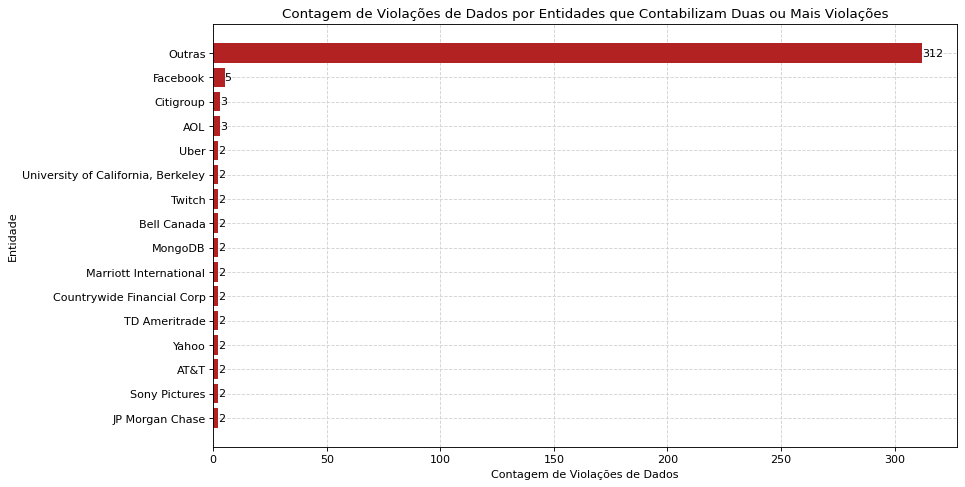

In [14]:
# Definindo x e y

temp_df = df['entity'].value_counts().reset_index()
temp_df = temp_df[temp_df['entity']>1].rename(columns={'index': 'entidade', 'entity': 'contagem'})

others = {
    'entidade': ['Outras'],
    'contagem' : [df['entity'].value_counts().sum() - temp_df['contagem'].sum()]
}

new_df = pd.concat([temp_df,pd.DataFrame.from_dict(others)]).sort_values(by='contagem')

y = new_df['entidade']
width = new_df['contagem']

# Definindo subplot
fig, ax = plt.subplots(figsize=(12,7), dpi=80)

# Grafico de barras horizontal
plt.barh(y, width, color='firebrick')

# Título e etiquetas do gráfico
plt.title('Contagem de Violações de Dados por Entidades que Contabilizam Duas ou Mais Violações')
plt.xlabel('Contagem de Violações de Dados')
plt.ylabel('Entidade')

# Grade
ax.set_axisbelow(True)
plt.grid(linestyle='dashed', color='lightgrey')

# Etiqueta das barras
ax.bar_label(ax.containers[0], label_type='edge')

# Exibição
plt.show()

Considerações
* As 347 violações de dados se dividem entre as 327 entidades distintas existentes neste conjunto de dados;
* A entidade Facebook lidera o gráfico com 5 violações de dados distintas;
* Das 327 entidades, 15 delas possuem duas ou mais violações de dados que é igual a 4,58%;
* As 15 entidades com duas ou mais violações de dados somam 35 violações, representando 10,08% do total.

#### Coluna Ano

In [15]:
temp_df = df['year'].value_counts().reset_index().rename(columns={'index': 'ano', 'year': 'contagem'})
temp_df

,ano,contagem
0,2011,34
1,2020,31
2,2019,29
3,2015,28
4,2013,28
5,2014,25
6,2018,24
7,2012,23
8,2016,20
9,2010,19


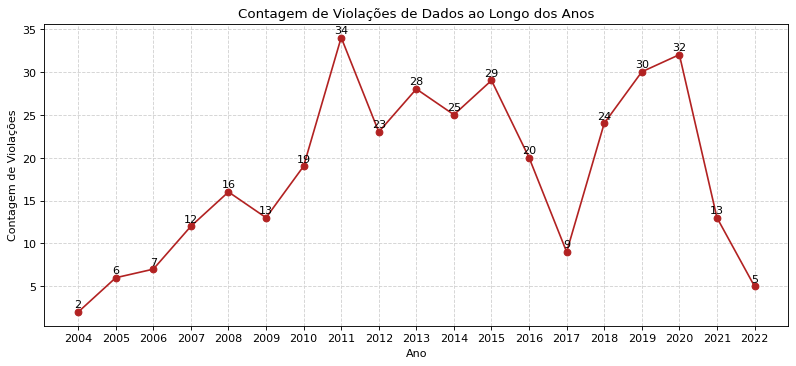

In [16]:
# Para uma melhor visualização, as violações onde ocorreram em mais de um ano são removidas e é acrescentado
# uma unidade a contagem do ano final da violação

index_list = []
year_list = []

for index,ano in zip(range(len(temp_df['ano'])), temp_df['ano']):
    if len(ano)>4:
        index_list.append(index)
        year_list.append(ano[-4:])
        
for year in year_list:
    # Adiciona uma unidade ao ano corrente
    temp_df.loc[temp_df['ano'] == year,'contagem'] = temp_df[temp_df['ano'] == year]['contagem'] + 1

# Remove os anos concatenados
new_df = temp_df.drop(index_list).sort_values('ano')

# Define os valores de X e Y
x = new_df['ano']
y = new_df['contagem']

# Definindo subplot
fig, ax = plt.subplots(figsize=(12,5), dpi=80)

# Grafico de barras horizontal
plt.plot(x, y, marker='o', color='firebrick')

# Título e etiquetas do gráfico
plt.title('Contagem de Violações de Dados ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Contagem de Violações')

# Grade
ax.set_axisbelow(True)
plt.grid(linestyle='dashed', color='lightgrey')

# Etiqueta das Linhas
for x,y in zip(x,y):
    plt.annotate(y,(x,y),textcoords="offset points",xytext=(0,4),ha='center')

# Exibição
plt.show()

Considerações
* É possível verificar um aumento significativo na quantidade de violações ao longo dos anos, e este fato se dá em detrimento da evolução tecnológica e da informatização de sistemas;
* Também é possível verificar que, nos anos atuais, o número de violações diminui pois as entidades investem em ciber-segurança ao verificarem o valor que os dados oferecem; 
* Neste conjunto de dados, 2011 foi o ano de maior número de violações de dados, aproximadamente 9,79% do número total de violações, seguido de 2020 com 9,22% e 2019 com 8,64%.

#### Coluna Registros

In [248]:
df['records'].value_counts()

unknown          21
1500000           7
1000000           6
500000            6
160000            4
                 ..
283000            1
250 locations     1
92000000          1
80000000          1
95000             1
Name: records, Length: 253, dtype: int64

Para a realização da análise numérica, os valores que não são convertíveis para números inteiros são desconsiderados.

In [304]:
index_list = []
temp_df = df['records'].value_counts().reset_index()['index']
for index, value in zip(range(len(temp_df)), temp_df):
    try:
        int(value)
    except:
        index_list.append(index)

new_df1 = temp_df.drop(index_list).astype('int64')

Verificando outliers

count    2.280000e+02
mean     5.246910e+07
std      2.196335e+08
min      6.700000e+03
25%      2.957500e+05
50%      2.250000e+06
75%      2.528790e+07
max      3.000000e+09
Name: index, dtype: float64


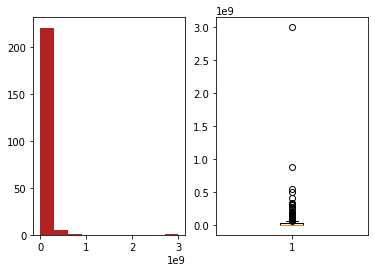

In [306]:
print(new_df1.describe())

fig, ax = plt.subplots(1,2)
ax[0].hist(new_df1, color='firebrick')
ax[1].boxplot(new_df1)
plt.show()

A alta discrepancia entre os valores dos dados solicita um processamento

Verificando limites para tratamento dos outliers

In [307]:
# Primeiro Quartil
q1 = new_df1.quantile(0.25)
print(f"Q1: {q1}")

# Terceiro Quartil
q3 = new_df1.quantile(0.75)
print(f"Q3: {q3}")

# Intervalo Interquartílico
ii = q3 - q1
print(f"II: {ii}")

# Limite Inferior
li = q1-(1.5*ii)
print(f"LI: {li}")

# Limite Superior
ls = q3+(1.5*ii)
print(f"LS: {ls}")

Q1: 295750.0
Q3: 25287902.0
II: 24992152.0
LI: -37192478.0
LS: 62776130.0


Função auxiliar para converter números astronômicos em strings menores

In [326]:
def converte_num(valor):
    if valor > 1000000000000:
        return f'{round(valor/1000000000000)} Tri'
    elif valor > 1000000000:
        return f'{round(valor/1000000000)} Bi'
    elif valor > 1000000:
        return f'{round(valor/1000000)} Mi'
    elif valor > 1000:
        return f'{round(valor/1000)} Mil'
    else:
        return f'{round(valor)}'

Definindo caixa de texto auxiliar para o boxplot 1

In [327]:
text_box = f'''
Contagem: {converte_num(new_df1.describe()[0])}
Média: {converte_num(new_df1.describe()[1])}
Desvio Padrão: {converte_num(new_df1.describe()[2])}
Mínimo: {converte_num(new_df1.describe()[3])}
25%: {converte_num(new_df1.describe()[4])}
50%: {converte_num(new_df1.describe()[5])}
75%: {converte_num(new_df1.describe()[6])}
Lim. Sup.: {converte_num(ls)}
Máximo: {converte_num(new_df1.describe()[7])}
'''

Plotando resultado

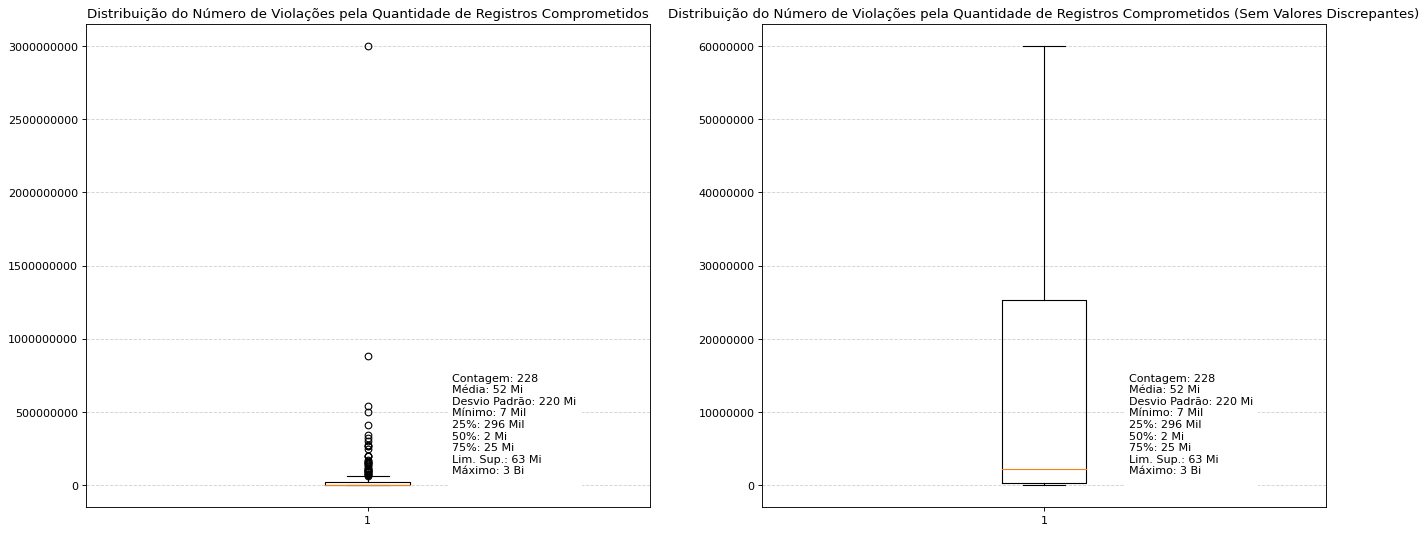

In [324]:
# Definindo subplots
fig, ax = plt.subplots(1,2, figsize=(20,8), dpi=80)

# Boxplot
ax[0].ticklabel_format(axis='both',style='plain')
ax[0].boxplot(new_df1)
ax[0].set_title("Distribuição do Número de Violações pela Quantidade de Registros Comprometidos")
ax[0].set_axisbelow(True)
ax[0].grid(linestyle='dashed', color='lightgrey', axis='y')
ax[0].text(1.15,0,f'{text_box}', backgroundcolor='white')

# Boxplot Sem Outliers
ax[1].ticklabel_format(axis='both',style='plain')
ax[1].boxplot(new_df1, showfliers=False)
ax[1].set_title("Distribuição do Número de Violações pela Quantidade de Registros Comprometidos (Sem Valores Discrepantes)")
ax[1].set_axisbelow(True)
ax[1].grid(linestyle='dashed', color='lightgrey', axis='y')
ax[1].text(1.15,0,f'{text_box}', backgroundcolor='white')

# Exibição
plt.show()

Considerações:
* Neste conjunto, a média de registros comprometidos por violações de dados é igual a 52 milhões, com um desvio padrão de 220 mil;
* O maior número de registros comprometidos em uma única violação registrado neste conjunto é igual a 3 bilhões de registros;
* 75% das violações resultaram entre 7 mil e 25 milhões de registros comprometidos, o restante das violações resultaram entre 25 milhões e 3 bilhões de registros;
* As violações que revelam acima de 63 milhões de registros comprometidos são considerados valores discrepantes.

#### Coluna Tipo de Organização

In [329]:
df['organization_type'].value_counts()

web                           53
healthcare                    47
financial                     38
government                    29
retail                        27
                              ..
humanitarian                   1
special public corporation     1
shopping                       1
local search                   1
various                        1
Name: organization_type, Length: 68, dtype: int64

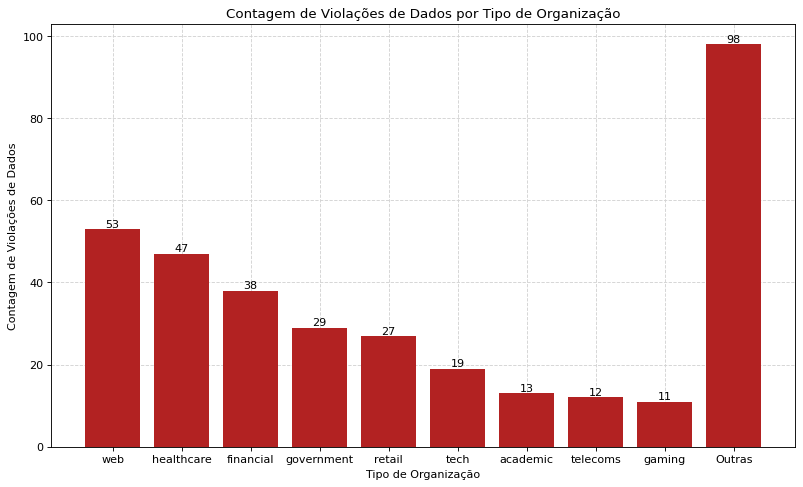

In [347]:
# Definindo x e y

temp_df = df['organization_type'].value_counts().reset_index()
temp_df = temp_df[temp_df['organization_type']>10].rename(columns={'index': 'tipo_de_organizacao', 'organization_type': 'contagem'})

others = {
    'tipo_de_organizacao': ['Outras'],
    'contagem' : [df['organization_type'].value_counts().sum() - temp_df['contagem'].sum()]
}

new_df = pd.concat([temp_df,pd.DataFrame.from_dict(others)])

x = new_df['tipo_de_organizacao']
y = new_df['contagem']

# Definindo subplot
fig, ax = plt.subplots(figsize=(12,7), dpi=80)

# Grafico de barras horizontal
plt.bar(x, y, color='firebrick')

# Título e etiquetas do gráfico
plt.title('Contagem de Violações de Dados por Tipo de Organização')
plt.xlabel('Tipo de Organização')
plt.ylabel('Contagem de Violações de Dados')

# Grade
ax.set_axisbelow(True)
plt.grid(linestyle='dashed', color='lightgrey')

# Etiqueta das barras
ax.bar_label(ax.containers[0], label_type='edge')

# Exibição
plt.show()

Considerações
* As organizações do tipo web são as que mais sofreram violações de dados bem sucedidas, totabilizando 53 violações distintas, que é equivalente a 15% do valor total de violações;

# EM DESENVOLVIMENTO